In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 통계 분석 패키지
from scipy import stats
import scipy.stats

from scipy.stats import shapiro # 정규성 검증
from statsmodels.formula.api import ols # 회귀분석
# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency #카이제곱 검정
from scipy.stats import bartlett

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm

# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [2]:
%matplotlib inline

#import matplotlib.pyplot as plt

# 맑은 고딕 적용
matplotlib.rc("font", family = "NaNumGothic")

# 음수 표시
# -값 표시
matplotlib.rc('axes', unicode_minus=False)

- 주문 건당 매출 (충원)
- 재구매율 확인 (충원)

In [3]:
df_orders=pd.read_csv("./on_orders.csv", encoding="cp949")
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [71]:
df_items=pd.read_csv("./on_items.csv", encoding="cp949")
df_items

L1    2708
L4    1054
L5     172
L3      55
Name: ItemLargeCode, dtype: int64

In [5]:
df_users=pd.read_csv("./on_users.csv", encoding="cp949")
df_users

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y
...,...,...,...,...,...
2995,U12996,여성,66,2,N
2996,U12997,남성,24,2,Y
2997,U12998,남성,31,2,Y
2998,U12999,여성,32,1,Y


In [93]:
df_target=pd.read_csv("./target.csv", encoding="utf-8", index_col=0)
df_target

,idUser,idOrder,ItemCode,Price,Gender,Age,FamilyCount,MemberYN,d_year,d_month,...,d_minute,o_year,o_month,o_day,o_hour,o_minute,o_sec,ItemName,PriceMin,PriceMax
0,U10001,U10001-O2021-1002,L4-M17-S0530-1024,33310,여성,26.0,2.0,Y,2021,1,...,24,2021,1,7,17,8,51,완도 활전복 1kg 중 22-25미,33160.0,37070.0
1,U10001,U10001-O2021-1002,L1-M21-S0540-1082,3780,여성,26.0,2.0,Y,2021,1,...,24,2021,1,7,17,8,51,동원 양반 차돌된장찌개 (460G),3690.0,3970.0
2,U10001,U10001-O2021-1002,L1-M15-S0140-1311,22520,여성,26.0,2.0,Y,2021,1,...,24,2021,1,7,17,8,51,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,22150.0,23150.0
3,U10001,U10001-O2021-1002,L4-M12-S0350-1035,21630,여성,26.0,2.0,Y,2021,1,...,24,2021,1,7,17,8,51,[산지직송] 새콤달콤 부사 사과 5kg (13과내),20810.0,23030.0
4,U10001,U10001-O2021-1003,L4-M12-S0640-1057,11700,여성,26.0,2.0,Y,2021,1,...,28,2021,1,14,16,50,14,스테비아 방울 토마토 라루 토망고 1kg,11640.0,13020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,L4-M12-S0350-1063,11520,여성,30.0,1.0,N,2023,12,...,23,2023,12,28,14,6,13,경북 부사사과 가정용 한입 1.5kg 11과내,11100.0,11900.0
856619,U13000,U13000-O2023-1008,L1-M12-S0330-1011,18870,여성,30.0,1.0,N,2023,12,...,23,2023,12,28,14,6,13,국산 냉동 블루베리 1kg,18820.0,20180.0
856620,U13000,U13000-O2023-1008,L1-M21-S0540-1161,3120,여성,30.0,1.0,N,2023,12,...,23,2023,12,28,14,6,13,오뚜기 어린이 카레 80G,3080.0,3300.0
856621,U13000,U13000-O2023-1008,L1-M17-S0030-1016,37760,여성,30.0,1.0,N,2023,12,...,23,2023,12,28,14,6,13,[왕특대] 이동삼 안동 간고등어 140gX20팩,35420.0,37980.0


In [19]:
df_order_price=df_orders.groupby(['idOrder','idUser'])['Price'].sum().reset_index()

In [20]:
df_order_price.sort_values(by='Price',ascending=False)

,idOrder,idUser,Price
165517,U12888-O2023-1018,U12888,278450
52312,U10914-O2023-1002,U10914,266290
634,U10012-O2023-1004,U10012,256340
68097,U11194-O2023-1021,U11194,252960
9938,U10171-O2023-1003,U10171,245090
...,...,...,...
102456,U11784-O2021-1013,U11784,1280
134528,U12353-O2022-1003,U12353,1240
164145,U12866-O2021-1014,U12866,1240
44765,U10782-O2022-1021,U10782,1220


In [21]:
df_order_products = df_orders.groupby(['idOrder', 'idUser'])['ItemCode'].apply(list).reset_index()


In [22]:
df_order_products

,idOrder,idUser,ItemCode
0,U10001-O2021-1001,U10001,"[L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-..."
1,U10001-O2021-1002,U10001,"[L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-..."
2,U10001-O2021-1003,U10001,"[L4-M12-S0640-1057, L4-M12-S0350-1002, L1-M11-..."
3,U10001-O2021-1004,U10001,"[L4-M12-S0200-1021, L3-M16-S0390-1051, L1-M11-..."
4,U10001-O2021-1005,U10001,"[L1-M11-S0340-1017, L4-M22-S0700-1019, L1-M15-..."
...,...,...,...
171965,U13000-O2023-1016,U13000,"[L4-M22-S0700-1054, L4-M22-S0360-1062, L4-M12-..."
171966,U13000-O2023-1017,U13000,"[L4-M22-S0700-1061, L1-M12-S0200-1009, L1-M21-..."
171967,U13000-O2023-1018,U13000,"[L5-M20-S0720-1042, L4-M22-S0680-1025, L4-M22-..."
171968,U13000-O2023-1019,U13000,"[L4-M17-S0130-1003, L4-M12-S0350-1099, L1-M23-..."


In [23]:
# 1. 주문자별 가격 합계 계산
df_order_price = df_orders.groupby(['idOrder', 'idUser'])['Price'].sum().reset_index()

# 2. 주문별로 구매한 상품 코드 리스트화
df_order_items = df_orders.groupby(['idOrder', 'idUser'])['ItemCode'].apply(list).reset_index()

# 3. 두 DataFrame 병합
df_combined = pd.merge(df_order_price, df_order_items, on=['idOrder', 'idUser'])

# 결과 확인
print(df_combined)

                  idOrder  idUser   Price  \
0       U10001-O2021-1001  U10001   92900   
1       U10001-O2021-1002  U10001   81240   
2       U10001-O2021-1003  U10001   60350   
3       U10001-O2021-1004  U10001   66370   
4       U10001-O2021-1005  U10001  142840   
...                   ...     ...     ...   
171965  U13000-O2023-1016  U13000  100720   
171966  U13000-O2023-1017  U13000   46950   
171967  U13000-O2023-1018  U13000   18810   
171968  U13000-O2023-1019  U13000   74280   
171969  U13000-O2023-1020  U13000   84900   

                                                 ItemCode  
0       [L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-...  
1       [L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...  
2       [L4-M12-S0640-1057, L4-M12-S0350-1002, L1-M11-...  
3       [L4-M12-S0200-1021, L3-M16-S0390-1051, L1-M11-...  
4       [L1-M11-S0340-1017, L4-M22-S0700-1019, L1-M15-...  
...                                                   ...  
171965  [L4-M22-S0700-1054, L4-M22-S036

In [26]:
df_combined.sort_values(by='Price', ascending=False)

,idOrder,idUser,Price,ItemCode
165517,U12888-O2023-1018,U12888,278450,"[L4-M17-S0130-1014, L4-M12-S0350-1111, L4-M12-..."
52312,U10914-O2023-1002,U10914,266290,"[L4-M12-S0620-1027, L4-M12-S0620-1018, L4-M12-..."
634,U10012-O2023-1004,U10012,256340,"[L4-M22-S0860-1002, L4-M22-S0700-1041, L4-M18-..."
68097,U11194-O2023-1021,U11194,252960,"[L5-M20-S0720-1026, L4-M17-S0530-1022, L4-M12-..."
9938,U10171-O2023-1003,U10171,245090,"[L4-M22-S0670-1043, L4-M22-S0360-1058, L1-M12-..."
...,...,...,...,...
102456,U11784-O2021-1013,U11784,1280,[L1-M17-S0380-1066]
134528,U12353-O2022-1003,U12353,1240,[L4-M22-S0650-1045]
164145,U12866-O2021-1014,U12866,1240,[L1-M11-S0220-1041]
44765,U10782-O2022-1021,U10782,1220,[L4-M17-S0810-1007]


In [28]:
product_dict = dict(zip(df_items['ItemCode'], df_items['ItemName']))


In [29]:
df_combined['ProductName'] = df_combined['ItemCode'].apply(lambda x: [product_dict[code] for code in x])

In [35]:
len(df_combined['ItemCode'][0])

7

In [36]:
len(df_combined['ProductName'][0])

7

In [39]:
df_sort=df_combined.sort_values(by='Price', ascending=False)

In [42]:
df_sort

,idOrder,idUser,Price,ItemCode,ProductName
165517,U12888-O2023-1018,U12888,278450,"[L4-M17-S0130-1014, L4-M12-S0350-1111, L4-M12-...","[국산 고흥 산낙지 낙지 뻘낙지 활낙지 중 5마리, 장길영사과 세척사과 실중량 3k..."
52312,U10914-O2023-1002,U10914,266290,"[L4-M12-S0620-1027, L4-M12-S0620-1018, L4-M12-...","[농협과일 국내산 골드키위 3kg 40과내, 골드키위 3kg 왕점보 20-24개, ..."
634,U10012-O2023-1004,U10012,256340,"[L4-M22-S0860-1002, L4-M22-S0700-1041, L4-M18-...","[국산아작아작콩나물(350g), 냉동 애호박볶음용 야채믹스 1kgx3팩, 미친김치 ..."
68097,U11194-O2023-1021,U11194,252960,"[L5-M20-S0720-1026, L4-M17-S0530-1022, L4-M12-...","[광동제약 비타500 칼슘 180ML*4, 완도 활전복 1kg 25-30미_국내산(..."
9938,U10171-O2023-1003,U10171,245090,"[L4-M22-S0670-1043, L4-M22-S0360-1058, L1-M12-...","[파프리카 혼합 특 3kg, 청상추 4Kg, [쿠팡 직수입] 칠레산 냉동 블루베리,..."
...,...,...,...,...,...
102456,U11784-O2021-1013,U11784,1280,[L1-M17-S0380-1066],[동원에프앤비 동원 살코기 참치 라이트 스탠다드 150g]
134528,U12353-O2022-1003,U12353,1240,[L4-M22-S0650-1045],[양파 대파 감자 마늘 생강 조개 과일망 메시 메쉬 그물망 일자형]
164145,U12866-O2021-1014,U12866,1240,[L1-M11-S0220-1041],[농심 신라면 블랙 사발 101G]
44765,U10782-O2022-1021,U10782,1220,[L4-M17-S0810-1007],[참조기(200~400g)]


In [43]:
df_sort['ProductName'][165517]

['국산 고흥 산낙지 낙지 뻘낙지 활낙지 중 5마리',
 '장길영사과 세척사과 실중량 3kg+3kg(20~30과)',
 '[바로배송][경상북도][껍질째 먹는 경북사과]산들네 세척사과 5kg 28과내',
 'GAP인증 청송사과 꿀 사과 부사 8kg 가정용 36-50과',
 '성경 굽지않은 김밥김 21g(10매)x10봉 (총100장) 낱개구성',
 '[소문난 삼부자] 삼둥이 파래광천도시락김 총 128봉 (4gx128봉)',
 '얇은피 교자만두(매콤해물) 420gx6봉',
 '고기왕만두 1.4kg+김치왕만두 1.4kg+고기손만두 1.4kg+김치손만두 1.4kg',
 '[고향의맛] 한입에 쏙 들어가는 물만두 1.35kgX3봉']

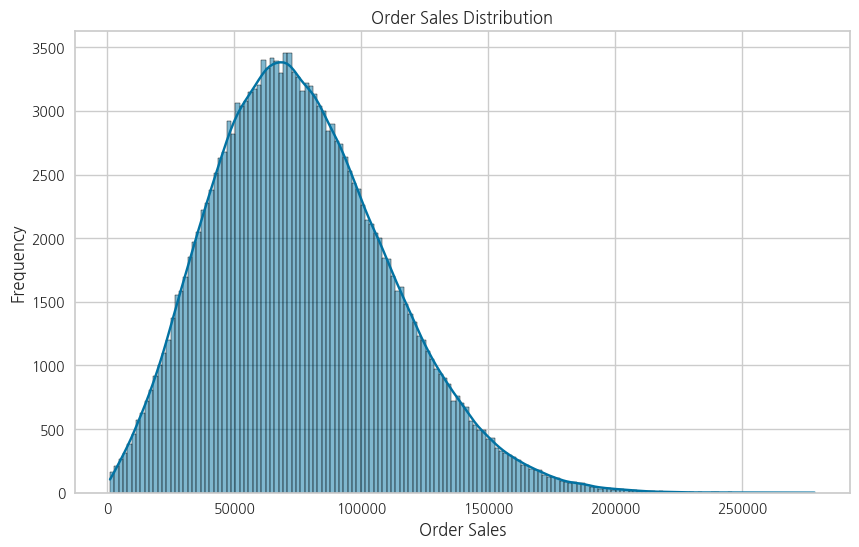

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Price'], kde=True)
plt.title('Order Sales Distribution')
plt.xlabel('Order Sales')
plt.ylabel('Frequency')
plt.show()

<Axes: title={'center': 'Sales by Weekday'}, xlabel='Weekday'>

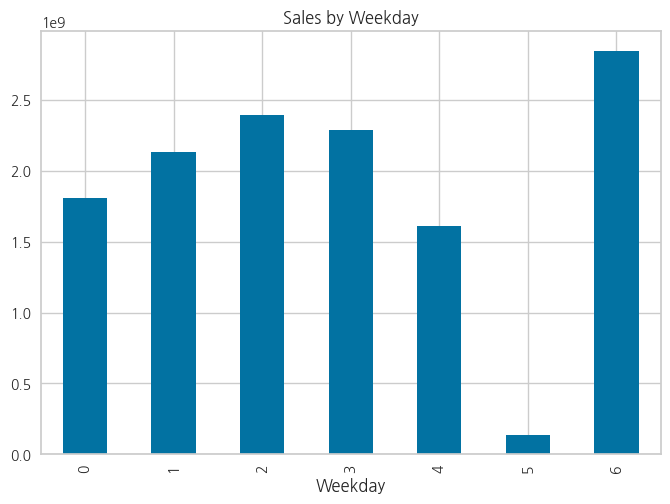

In [47]:
df_combined['OrderDate'] = pd.to_datetime(df_orders['OrderDT'],format='%d%b%y:%H:%M:%S')
df_combined['Weekday'] = df_combined['OrderDate'].dt.weekday
weekday_sales = df_combined.groupby('Weekday')['Price'].sum()
weekday_sales.plot(kind='bar', title='Sales by Weekday')

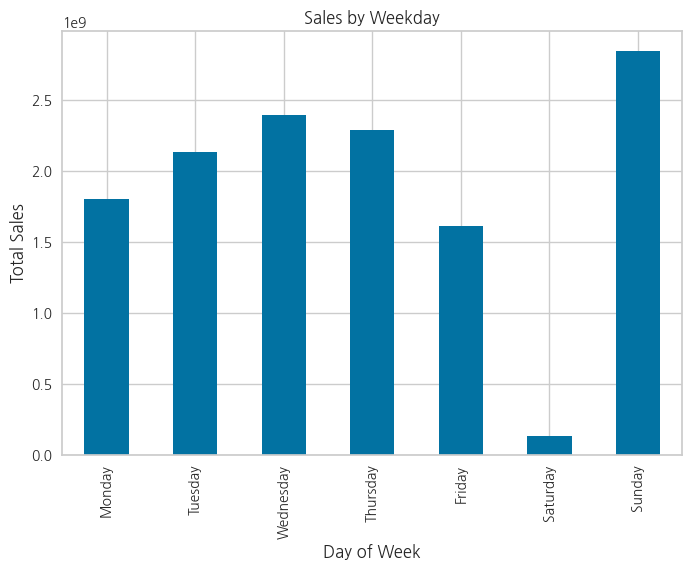

In [48]:
# 요일 이름 리스트
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일 이름으로 인덱스 설정
weekday_sales.index = weekday_names

# 막대 그래프 그리기
weekday_sales.plot(kind='bar', title='Sales by Weekday')
plt.xlabel('Day of Week')  # x축 레이블
plt.ylabel('Total Sales')  # y축 레이블
plt.show()

In [46]:
df_combined['RepeatCustomer'] = df_combined['idUser'].duplicated(keep=False)
repeat_customer_sales = df_combined.groupby('RepeatCustomer')['Price'].mean()
print(repeat_customer_sales)

RepeatCustomer
True    76837.885213
Name: Price, dtype: float64


In [49]:
df_combined['RepeatCustomer'] = df_combined['idUser'].duplicated(keep=False)
repeat_customer_sales = df_combined.groupby('RepeatCustomer')['Price'].median()
print(repeat_customer_sales)

RepeatCustomer
True    73770.0
Name: Price, dtype: float64


In [51]:
# 'OrderDT'와 'DeliveryDT'를 datetime 형식으로 변환
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%Y:%H:%M:%S')
df_orders['DeliveryDT'] = pd.to_datetime(df_orders['DeliveryDT'], format='%d%b%Y:%H:%M:%S')

# '소요 시간' 계산 (주문 시각과 배송 시각의 차이)
df_orders['DeliveryTime'] = (df_orders['DeliveryDT'] - df_orders['OrderDT']).dt.total_seconds() / 3600  # 시간 단위로 변환

# 평균 배송 소요 시간 계산
average_delivery_time = df_orders['DeliveryTime'].mean()
print(f'평균 배송 소요 시간: {average_delivery_time:.2f} 시간')

평균 배송 소요 시간: 17.58 시간


In [52]:
# 배송 시각이 7시를 넘는지 확인
df_orders['DeliveryHour'] = df_orders['DeliveryDT'].dt.hour

# 배송 시각이 7시를 넘은 경우를 '새벽배송 지연'으로 분류
df_orders['LateDelivery'] = df_orders['DeliveryHour'] > 7

# 새벽배송 지연 건수 및 비율 계산
late_delivery_count = df_orders['LateDelivery'].sum()
late_delivery_rate = late_delivery_count / len(df_orders) * 100  # 비율

print(f'새벽배송 지연 건수: {late_delivery_count}')
print(f'새벽배송 지연 비율: {late_delivery_rate:.2f}%')

새벽배송 지연 건수: 0
새벽배송 지연 비율: 0.00%


In [53]:
# 주문일자와 배송일자 비교
df_orders['SameDayDelivery'] = (df_orders['OrderDT'].dt.date == df_orders['DeliveryDT'].dt.date)
same_day_delivery_rate = df_orders['SameDayDelivery'].mean() * 100  # 당일 배송 비율
print(f'당일 배송 비율: {same_day_delivery_rate:.2f}%')

당일 배송 비율: 0.00%


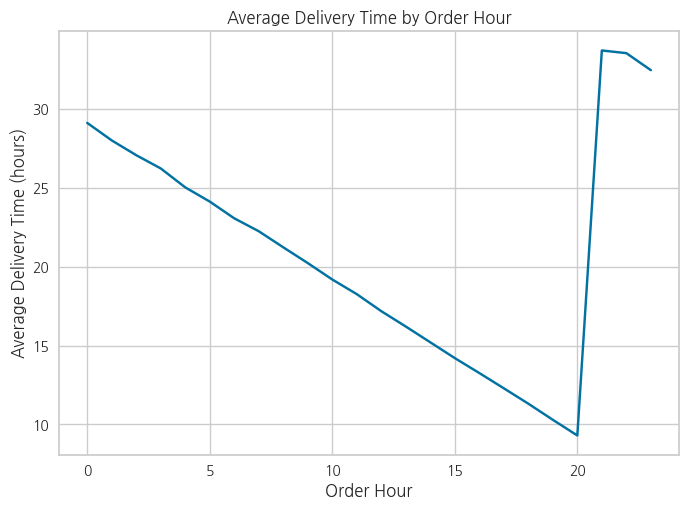

In [54]:
df_orders['OrderHour'] = df_orders['OrderDT'].dt.hour  # 주문 시간대 추출
delivery_time_by_order_hour = df_orders.groupby('OrderHour')['DeliveryTime'].mean()
delivery_time_by_order_hour.plot(kind='line', title='Average Delivery Time by Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Average Delivery Time (hours)')
plt.show()

In [55]:
# '7시 이후 배송'된 주문들을 필터링
df_orders['LateDeliveryAfter7'] = df_orders['DeliveryHour'] > 7

# 7시 이후 배송된 주문들이 '다음날 배송'으로 넘어가는지 확인
df_orders['NextDayDelivery'] = df_orders['OrderDT'].dt.date != df_orders['DeliveryDT'].dt.date

# 7시 이후 배송된 주문들이 '다음날 배송'으로 넘어간 경우 확인
late_after_7_and_next_day = df_orders[df_orders['LateDeliveryAfter7'] & df_orders['NextDayDelivery']]

# 결과 출력
print(late_after_7_and_next_day[['OrderDT', 'DeliveryDT', 'DeliveryHour', 'LateDeliveryAfter7', 'NextDayDelivery']])

Empty DataFrame
Columns: [OrderDT, DeliveryDT, DeliveryHour, LateDeliveryAfter7, NextDayDelivery]
Index: []


In [56]:
# 시간 값 이상 여부 확인: 24시 이상 또는 60분 이상인 경우
invalid_time_orders = df_orders[(df_orders['OrderDT'].dt.hour >= 24) | 
                                 (df_orders['OrderDT'].dt.minute >= 60) |
                                 (df_orders['DeliveryDT'].dt.hour >= 24) | 
                                 (df_orders['DeliveryDT'].dt.minute >= 60)]

# 이상한 시간 값이 있는 행들 출력
print(invalid_time_orders)

Empty DataFrame
Columns: [idUser, idOrder, OrderDT, ItemCode, Price, DeliveryDT, DeliveryTime, DeliveryHour, LateDelivery, SameDayDelivery, OrderHour, LateDeliveryAfter7, NextDayDelivery]
Index: []


In [57]:
# 주문일자와 배송일자 간 차이를 계산 (단위: 일)
df_orders['DeliveryDelay'] = (df_orders['DeliveryDT'] - df_orders['OrderDT']).dt.days

# 날짜 차이가 2일 이상인 주문 찾기
delayed_orders = df_orders[df_orders['DeliveryDelay'] >= 2]

# 날짜 차이가 2일 이상인 주문 건수 확인
delayed_order_count = delayed_orders.shape[0]
print(f"주문과 배송 사이의 차이가 2일 이상인 주문 건수: {delayed_order_count}")

# 날짜 차이 분포 확인
print(df_orders['DeliveryDelay'].describe())

주문과 배송 사이의 차이가 2일 이상인 주문 건수: 15068
count    856623.000000
mean          0.199620
std           0.441534
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: DeliveryDelay, dtype: float64


In [58]:
delayed_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,DeliveryTime,DeliveryHour,LateDelivery,SameDayDelivery,OrderHour,LateDeliveryAfter7,NextDayDelivery,DeliveryDelay
123,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L1-M15-S0140-1395,5690,2022-01-17 06:52:00,55.120556,6,False,False,23,False,True,2
124,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L1-M24-S0600-1121,33200,2022-01-17 06:52:00,55.120556,6,False,False,23,False,True,2
125,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L1-M21-S0540-1166,1780,2022-01-17 06:52:00,55.120556,6,False,False,23,False,True,2
126,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L4-M12-S0350-1125,24400,2022-01-17 06:52:00,55.120556,6,False,False,23,False,True,2
127,U10001,U10001-O2022-1001,2022-01-14 23:44:46,L4-M12-S0350-1018,16550,2022-01-17 06:52:00,55.120556,6,False,False,23,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856268,U12999,U12999-O2023-1004,2023-04-28 22:28:55,L4-M22-S0170-1014,14610,2023-05-01 05:20:00,54.851389,5,False,False,22,False,True,2
856269,U12999,U12999-O2023-1004,2023-04-28 22:28:55,L4-M12-S0350-1118,32050,2023-05-01 05:20:00,54.851389,5,False,False,22,False,True,2
856270,U12999,U12999-O2023-1004,2023-04-28 22:28:55,L1-M23-S0420-1037,10420,2023-05-01 05:20:00,54.851389,5,False,False,22,False,True,2
856271,U12999,U12999-O2023-1004,2023-04-28 22:28:55,L1-M19-S0730-1016,12580,2023-05-01 05:20:00,54.851389,5,False,False,22,False,True,2


In [59]:
# 배송 소요 시간을 일 단위로 계산
df_orders['DeliveryDelay'] = (df_orders['DeliveryDT'] - df_orders['OrderDT']).dt.days

# 배송이 1일 이상 걸린 주문 찾기
delayed_orders_1day = df_orders[df_orders['DeliveryDelay'] >= 1]

# 1일 이상 걸린 주문 건수 확인
delayed_orders_1day_count = delayed_orders_1day.shape[0]
print(f"배송이 1일 이상 걸린 주문 건수: {delayed_orders_1day_count}")

# 배송 소요 시간 1일 이상인 주문 비율 계산
delayed_orders_1day_rate = delayed_orders_1day_count / len(df_orders) * 100
print(f"배송이 1일 이상 걸린 주문 비율: {delayed_orders_1day_rate:.2f}%")

배송이 1일 이상 걸린 주문 건수: 155931
배송이 1일 이상 걸린 주문 비율: 18.20%


In [60]:
delayed_orders_1day

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,DeliveryTime,DeliveryHour,LateDelivery,SameDayDelivery,OrderHour,LateDeliveryAfter7,NextDayDelivery,DeliveryDelay
12,U10001,U10001-O2021-1005,2021-01-28 21:07:31,L1-M11-S0340-1017,1890,2021-01-30 06:41:00,33.558056,6,False,False,21,False,True,1
13,U10001,U10001-O2021-1005,2021-01-28 21:07:31,L4-M22-S0700-1019,31240,2021-01-30 06:41:00,33.558056,6,False,False,21,False,True,1
14,U10001,U10001-O2021-1005,2021-01-28 21:07:31,L1-M15-S0140-1401,16240,2021-01-30 06:41:00,33.558056,6,False,False,21,False,True,1
15,U10001,U10001-O2021-1005,2021-01-28 21:07:31,L4-M22-S0670-1001,31420,2021-01-30 06:41:00,33.558056,6,False,False,21,False,True,1
16,U10001,U10001-O2021-1005,2021-01-28 21:07:31,L1-M19-S0190-1023,8530,2021-01-30 06:41:00,33.558056,6,False,False,21,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856611,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L4-M12-S0350-1047,25480,2023-12-12 06:12:00,31.918889,6,False,False,22,False,True,1
856612,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L3-M16-S0390-1021,5400,2023-12-12 06:12:00,31.918889,6,False,False,22,False,True,1
856613,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L1-M17-S0500-1001,24760,2023-12-12 06:12:00,31.918889,6,False,False,22,False,True,1
856614,U13000,U13000-O2023-1015,2023-12-10 22:16:52,L1-M15-S0140-1279,8240,2023-12-12 06:12:00,31.918889,6,False,False,22,False,True,1


In [61]:

# 신선식품을 포함한 상품 코드 목록 생성
df_items['IsFresh'] = df_items['category'].apply(lambda x: any(keyword in x for keyword in fresh_food_keywords))

# 신선식품인 아이템 코드만 필터링
fresh_food_items = df_items[df_items['IsFresh']]['item_code']

# 신선식품을 포함한 주문 찾기 (상품 코드가 신선식품 목록에 있는 경우)
delayed_orders_1day['ContainsFreshFood'] = delayed_orders_1day['idOrder'].apply(
    lambda order_id: any(item_code in fresh_food_items for item_code in df_orders[df_orders['idOrder'] == order_id]['item_code'])
)

# 신선식품이 포함된 주문만 필터링
delayed_orders_1day_with_fresh = delayed_orders_1day[delayed_orders_1day['ContainsFreshFood']]

# 신선식품 포함 주문 건수 및 비율 계산
fresh_food_order_count = delayed_orders_1day_with_fresh.shape[0]
fresh_food_order_rate = fresh_food_order_count / delayed_orders_1day_count * 100

print(f"1일 이상 배송 지연된 신선식품 주문 건수: {fresh_food_order_count}")
print(f"1일 이상 배송 지연된 신선식품 주문 비율: {fresh_food_order_rate:.2f}%")

KeyError: 'category'

In [64]:
# 신선식품을 포함한 상품 코드 목록 생성 (ItemLargeCode가 'L1'인 경우)
df_items['IsFresh'] = df_items['ItemLargeCode'] == 'L1'

# 신선식품인 아이템 코드만 필터링
fresh_food_items = df_items[df_items['IsFresh']]['ItemCode']

In [65]:
fresh_food_items

0       L1-M11-S0080-1001
1       L1-M11-S0080-1001
2       L1-M11-S0080-1001
3       L1-M11-S0080-1002
4       L1-M11-S0080-1002
              ...        
7928    L1-M17-S0030-1031
7929    L1-M17-S0030-1031
7930    L1-M17-S0030-1031
7931    L1-M17-S0030-1033
7932    L1-M17-S0030-1033
Name: ItemCode, Length: 6804, dtype: object

In [67]:
# 배송이 1일 이상 걸린 주문 데이터프레임 (delayed_orders_1day)에서 신선식품 포함 여부를 확인
delayed_orders_1day['ContainsFreshFood'] = delayed_orders_1day['idOrder'].apply(
    lambda order_id: any(item_code in fresh_food_items for item_code in df_orders[df_orders['idOrder'] == order_id]['ItemCode'])
)

# 신선식품이 포함된 주문만 필터링
delayed_orders_1day_with_fresh = delayed_orders_1day[delayed_orders_1day['ContainsFreshFood']]

# 신선식품 포함 주문 건수 및 비율 계산
fresh_food_order_count = delayed_orders_1day_with_fresh.shape[0]
fresh_food_order_rate = fresh_food_order_count / delayed_orders_1day_count * 100

print(f"1일 이상 배송 지연된 신선식품 주문 건수: {fresh_food_order_count}")
print(f"1일 이상 배송 지연된 신선식품 주문 비율: {fresh_food_order_rate:.2f}%")

KeyboardInterrupt: 

In [68]:
# df_orders와 df_items를 병합하여 'ContainsFreshFood' 컬럼을 생성
df_orders = df_orders.merge(df_items[['ItemCode', 'ItemLargeCode']], on='ItemCode', how='left')

# 신선식품의 대분류 코드 'L1'만 필터링 (이제 df_orders에는 'ItemLargeCode'가 있음)
df_orders['ContainsFreshFood'] = df_orders['ItemLargeCode'] == 'L1'

# 주문별로 신선식품이 포함되었는지 확인
df_orders['ContainsFreshFoodOrder'] = df_orders.groupby('idOrder')['ContainsFreshFood'].transform('any')

# 1일 이상 배송 지연된 주문만 필터링
delayed_orders_1day = df_orders[df_orders['DeliveryDelay'] >= 1]

# 신선식품 포함된 주문만 필터링
delayed_orders_1day_with_fresh = delayed_orders_1day[delayed_orders_1day['ContainsFreshFoodOrder']]

# 신선식품 포함 주문 건수 및 비율 계산
fresh_food_order_count = delayed_orders_1day_with_fresh.shape[0]
fresh_food_order_rate = fresh_food_order_count / delayed_orders_1day.shape[0] * 100

print(f"1일 이상 배송 지연된 신선식품 주문 건수: {fresh_food_order_count}")
print(f"1일 이상 배송 지연된 신선식품 주문 비율: {fresh_food_order_rate:.2f}%")

1일 이상 배송 지연된 신선식품 주문 건수: 407643
1일 이상 배송 지연된 신선식품 주문 비율: 97.26%


In [77]:
# 멤버와 비멤버 데이터프레임 필터링
df_member = df_target[df_target['MemberYN'] == 'Y']
df_non_member = df_target[df_target['MemberYN'] == 'N']

# 멤버와 비멤버 각각의 총 매출액과 고객 수 구하기
member_sales = df_member['Price'].sum()  # 멤버 총 매출
non_member_sales = df_non_member['Price'].sum()  # 비멤버 총 매출

# 멤버와 비멤버의 고유 고객 수 구하기 (고객 식별자로 idUser 사용)
member_count = df_member['idUser'].nunique()  # 멤버 고유 고객 수
non_member_count = df_non_member['idUser'].nunique()  # 비멤버 고유 고객 수

# 1인당 매출액 계산
member_avg_sales_per_user = member_sales / member_count
non_member_avg_sales_per_user = non_member_sales / non_member_count

# 결과 출력
print(f"멤버 1인당 매출액: {member_avg_sales_per_user:.2f}")
print(f"비멤버 1인당 매출액: {non_member_avg_sales_per_user:.2f}")

멤버 1인당 매출액: 4395062.71
비멤버 1인당 매출액: 4428936.06


In [82]:
from scipy import stats

# 멤버와 비멤버의 매출 데이터를 각각 리스트로 추출
member_sales_list = df_member['Price']
non_member_sales_list = df_non_member['Price']

# t-검정을 사용하여 두 집단 간의 매출 차이가 유의미한지 확인
t_stat, p_value = stats.ttest_ind(member_sales_list, non_member_sales_list, equal_var=False)

# 결과 출력
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# p-value가 0.05 미만이면 차이가 유의미하다고 판단
if p_value < 0.05:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미합니다.")
else:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.")

t-statistic: -0.147
p-value: 0.883
멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.


In [83]:
# 멤버와 비멤버 데이터프레임 필터링
df_member = df_target[df_target['MemberYN'] == 'Y']
df_non_member = df_target[df_target['MemberYN'] == 'N']

# 멤버와 비멤버의 1인당 매출액 중앙값 계산
member_avg_sales_per_user_median = df_member.groupby('idUser')['Price'].sum().median()  # 멤버의 1인당 매출액 중앙값
non_member_avg_sales_per_user_median = df_non_member.groupby('idUser')['Price'].sum().median()  # 비멤버의 1인당 매출액 중앙값

# 결과 출력
print(f"멤버 1인당 매출액 중앙값: {member_avg_sales_per_user_median:.2f}")
print(f"비멤버 1인당 매출액 중앙값: {non_member_avg_sales_per_user_median:.2f}")

멤버 1인당 매출액 중앙값: 4466450.00
비멤버 1인당 매출액 중앙값: 4496180.00


In [85]:
# 1. 고객별로 주문 건수 구하기
customer_order_counts = df_target.groupby('idUser')['idOrder'].nunique()

# 2. 각 고객이 멤버십에 가입했는지 여부 확인 (멤버십 여부: 'Y' or 'N')
df_target['MemberYN'] = df_target['MemberYN'].apply(lambda x: 1 if x == 'Y' else 0)

# 3. 고객별 주문 건수와 멤버십 여부를 결합한 데이터프레임 만들기
df_order_summary = df_target.groupby(['idUser', 'MemberYN'])['idOrder'].nunique().reset_index()

# 4. 각 고객의 매출액 계산 (주문 금액 합산)
df_order_summary['TotalSales'] = df_target.groupby('idUser')['Price'].sum().values

# 5. 각 고객의 매출액을 주문 건수별로 그룹화하여 확인
df_order_summary['OrderCount'] = df_order_summary.groupby('idUser')['idOrder'].transform('max')

# 6. 주문 건수 별로 그룹화하여 멤버십 여부에 따른 매출액 차이 확인
order_count_sales_comparison = df_order_summary.groupby(['OrderCount', 'MemberYN'])['TotalSales'].mean().reset_index()

# 7. 결과 출력
order_count_sales_comparison

,OrderCount,MemberYN,TotalSales
0,9,0,792360.0
1,10,0,943480.0
2,13,0,1196340.0
3,14,0,1148185.0
4,15,0,1287370.0
...,...,...,...
75,86,0,6564900.0
76,87,0,6283930.0
77,88,0,6535790.0
78,89,0,6570350.0


In [86]:
# 고객별 주문 건수 계산
df_order_summary = df_target.groupby(['idUser', 'MemberYN'])['idOrder'].count().reset_index()

# 고객별 총 매출액 계산
df_order_summary['TotalSales'] = df_target.groupby('idUser')['Price'].sum().values

# 주문 건수 추가 (최대 주문 건수를 사용)
df_order_summary['OrderCount'] = df_order_summary.groupby('idUser')['idOrder'].transform('max')

# 주문 건수 별로 그룹화하여 멤버십 여부에 따른 매출액 차이 계산
order_count_sales_comparison = df_order_summary.groupby(['OrderCount', 'MemberYN'])['TotalSales'].mean().reset_index()

# 결과 출력
order_count_sales_comparison

,OrderCount,MemberYN,TotalSales
0,52,0,867920.0
1,70,0,1130830.0
2,71,0,1196340.0
3,77,0,1165540.0
4,85,0,1364520.0
...,...,...,...
333,451,0,6849620.0
334,463,0,7114700.0
335,464,0,7035260.0
336,468,0,7368000.0


In [87]:
df_order_summary

,idUser,MemberYN,idOrder,TotalSales,OrderCount
0,U10001,0,347,5414990,347
1,U10002,0,275,4023340,275
2,U10003,0,289,4759100,289
3,U10004,0,161,2498420,161
4,U10005,0,371,5563770,371
...,...,...,...,...,...
2995,U12996,0,129,2070760,129
2996,U12997,0,343,5162470,343
2997,U12998,0,265,4246570,265
2998,U12999,0,300,4732180,300


In [88]:
df_order_summary

,idUser,MemberYN,idOrder,TotalSales,OrderCount
0,U10001,0,347,5414990,347
1,U10002,0,275,4023340,275
2,U10003,0,289,4759100,289
3,U10004,0,161,2498420,161
4,U10005,0,371,5563770,371
...,...,...,...,...,...
2995,U12996,0,129,2070760,129
2996,U12997,0,343,5162470,343
2997,U12998,0,265,4246570,265
2998,U12999,0,300,4732180,300


In [94]:
# 1. 고객별 총 매출액 계산
df_customer_sales = df_target.groupby(['idUser', 'MemberYN'])['Price'].sum().reset_index()

# 2. 고객별 총 매출액 계산 후, 멤버십 여부에 따라 그룹화하여 1인당 매출액 계산
df_member_sales = df_customer_sales[df_customer_sales['MemberYN'] == 'Y']
df_non_member_sales = df_customer_sales[df_customer_sales['MemberYN'] == 'N']

# 멤버와 비멤버의 1인당 매출액 계산
member_avg_sales_per_user = df_member_sales['Price'].sum() / df_member_sales['idUser'].nunique()  # 멤버의 1인당 매출액
non_member_avg_sales_per_user = df_non_member_sales['Price'].sum() / df_non_member_sales['idUser'].nunique()  # 비멤버의 1인당 매출액

# 결과 출력
print(f"멤버 1인당 매출액: {member_avg_sales_per_user:.2f}")
print(f"비멤버 1인당 매출액: {non_member_avg_sales_per_user:.2f}")

멤버 1인당 매출액: 4395062.71
비멤버 1인당 매출액: 4428936.06


In [99]:
df_customer_sales

,idUser,MemberYN,Price
0,U10001,Y,5414990
1,U10002,Y,4023340
2,U10003,Y,4759100
3,U10004,N,2498420
4,U10005,Y,5563770
...,...,...,...
2995,U12996,N,2070760
2996,U12997,Y,5162470
2997,U12998,Y,4246570
2998,U12999,Y,4732180


In [90]:
df_member_sales['idUser'].nunique()

0

In [91]:
df_member_sales 

,idUser,MemberYN,Price


In [92]:
df_customer_sales

,idUser,MemberYN,Price
0,U10001,0,5414990
1,U10002,0,4023340
2,U10003,0,4759100
3,U10004,0,2498420
4,U10005,0,5563770
...,...,...,...
2995,U12996,0,2070760
2996,U12997,0,5162470
2997,U12998,0,4246570
2998,U12999,0,4732180


In [95]:
from scipy import stats

# 멤버와 비멤버의 1인당 매출액 리스트
member_sales_list = df_member_sales['Price']
non_member_sales_list = df_non_member_sales['Price']

# t-검정 수행 (등분산 가정하지 않음)
t_stat, p_value = stats.ttest_ind(member_sales_list, non_member_sales_list, equal_var=False)

# 결과 출력
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# p-value가 0.05 미만이면 차이가 유의미하다고 판단
if p_value < 0.05:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미합니다.")
else:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.")

t-statistic: -0.834
p-value: 0.404
멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.


In [96]:
# idUser를 기준으로 그룹화하고, 각 사용자가 얼마나 구매했는지 총 매출액을 구합니다.
df_user_sales = df_orders.groupby('idUser')['Price'].sum().reset_index()

In [97]:

# idUser별 총 매출액과 멤버십 여부를 포함한 데이터프레임
df_user_sales_with_member = df_orders.groupby(['idUser', 'MemberYN'])['Price'].sum().reset_index()

# 결과 출력
print(df_user_sales_with_member.head())

KeyError: 'MemberYN'

In [98]:
# df_orders와 df_users를 'idUser'를 기준으로 병합
df_orders_with_membership = df_orders.merge(df_users[['idUser', 'MemberYN']], on='idUser', how='left')

# 각 고객별로 구매한 총 금액 계산
df_user_sales_with_member = df_orders_with_membership.groupby(['idUser', 'MemberYN'])['Price'].sum().reset_index()

# 멤버와 비멤버를 각각 구분하여 1인당 매출액 계산
df_member_sales = df_user_sales_with_member[df_user_sales_with_member['MemberYN'] == 'Y']
df_non_member_sales = df_user_sales_with_member[df_user_sales_with_member['MemberYN'] == 'N']

# 1인당 매출액 계산
member_avg_sales_per_user = df_member_sales['Price'].sum() / df_member_sales['idUser'].nunique()  # 멤버의 1인당 매출액
non_member_avg_sales_per_user = df_non_member_sales['Price'].sum() / df_non_member_sales['idUser'].nunique()  # 비멤버의 1인당 매출액

# 결과 출력
print(f"멤버 1인당 매출액: {member_avg_sales_per_user:.2f}")
print(f"비멤버 1인당 매출액: {non_member_avg_sales_per_user:.2f}")

멤버 1인당 매출액: 11832346.78
비멤버 1인당 매출액: 11916242.99


In [100]:
df_orders_with_membership

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,DeliveryTime,DeliveryHour,LateDelivery,SameDayDelivery,OrderHour,LateDeliveryAfter7,NextDayDelivery,DeliveryDelay,ItemLargeCode,ContainsFreshFood,ContainsFreshFoodOrder,MemberYN
0,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M17-S0530-1024,33310,2021-01-08 06:24:00,13.252500,6,False,False,17,False,True,0,L4,False,True,Y
1,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M17-S0530-1024,33310,2021-01-08 06:24:00,13.252500,6,False,False,17,False,True,0,L4,False,True,Y
2,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L4-M17-S0530-1024,33310,2021-01-08 06:24:00,13.252500,6,False,False,17,False,True,0,L4,False,True,Y
3,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M21-S0540-1082,3780,2021-01-08 06:24:00,13.252500,6,False,False,17,False,True,0,L1,True,True,Y
4,U10001,U10001-O2021-1002,2021-01-07 17:08:51,L1-M21-S0540-1082,3780,2021-01-08 06:24:00,13.252500,6,False,False,17,False,True,0,L1,True,True,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305786,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M21-S0540-1161,3120,2023-12-29 04:23:00,14.279722,4,False,False,14,False,True,0,L1,True,True,N
2305787,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M17-S0030-1016,37760,2023-12-29 04:23:00,14.279722,4,False,False,14,False,True,0,L1,True,True,N
2305788,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M15-S0140-1024,8660,2023-12-29 04:23:00,14.279722,4,False,False,14,False,True,0,L1,True,True,N
2305789,U13000,U13000-O2023-1008,2023-12-28 14:06:13,L1-M15-S0140-1024,8660,2023-12-29 04:23:00,14.279722,4,False,False,14,False,True,0,L1,True,True,N


In [101]:
df_user_sales_with_member

,idUser,MemberYN,Price
0,U10001,Y,14832530
1,U10002,Y,10917210
2,U10003,Y,12671490
3,U10004,N,6882200
4,U10005,Y,14672860
...,...,...,...
2995,U12996,N,5232290
2996,U12997,Y,14067130
2997,U12998,Y,11338280
2998,U12999,Y,12979170


In [102]:
# 1. 고객별 총 매출액 계산 (이미 df_customer_sales에 계산됨)
# df_customer_sales는 이미 idUser와 MemberYN별로 매출액을 합산한 데이터프레임

# 2. 멤버와 비멤버를 분리
df_member_sales = df_customer_sales[df_customer_sales['MemberYN'] == 'Y']
df_non_member_sales = df_customer_sales[df_customer_sales['MemberYN'] == 'N']

# 3. 멤버와 비멤버 각각의 1인당 매출액 계산
member_avg_sales_per_user = df_member_sales['Price'].sum() / df_member_sales['idUser'].nunique()  # 멤버의 1인당 매출액
non_member_avg_sales_per_user = df_non_member_sales['Price'].sum() / df_non_member_sales['idUser'].nunique()  # 비멤버의 1인당 매출액

# 4. 1인당 매출액 차이가 유의미한지 t-검정을 사용하여 확인
# 각 고객의 매출액을 계산하여 1인당 매출액의 분포를 검정
t_stat, p_value = stats.ttest_ind(df_member_sales['Price'], df_non_member_sales['Price'], equal_var=False)

# 결과 출력
print(f"멤버 1인당 매출액: {member_avg_sales_per_user:.2f}")
print(f"비멤버 1인당 매출액: {non_member_avg_sales_per_user:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# p-value가 0.05 미만이면 차이가 유의미하다고 판단
if p_value < 0.05:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미합니다.")
else:
    print("멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.")

멤버 1인당 매출액: 4395062.71
비멤버 1인당 매출액: 4428936.06
t-statistic: -0.834
p-value: 0.404
멤버와 비멤버 간의 매출 차이는 통계적으로 유의미하지 않습니다.
